In [1]:
import numpy as np
import matplotlib.pyplot as plt
# AdaBoost Algorithm
from sklearn.ensemble import AdaBoostClassifier
# Gradient Boosting 
from sklearn.ensemble import GradientBoostingClassifier

plt.rcParams['font.size'] = 14

In [2]:
# XGBoost 
#!pip install 

import xgboost
from xgboost import XGBClassifier
from xgboost import plot_importance, to_graphviz, plot_tree
print("XGBoost version:",xgboost.__version__)

XGBoost version: 1.5.2


In [3]:
from tensorflow.keras.utils import to_categorical

import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten #, Reshape
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D, GlobalMaxPooling1D
import pandas as pd

from keras import initializers, regularizers
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

from scipy import stats
import seaborn 
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing
from keras import initializers, regularizers
import tensorflow.random as tf_r
tf_r.set_seed(12345)
import warnings

In [4]:
np.random.seed(132)

CASE = 2

S = 2
N = 4000
N_train = 2000
N_test  = N - N_train
x = S*(2*np.random.rand(N,2)-1)
y = np.zeros(N).astype(int)

for n in range(N):
    if CASE==1:
        if x[n,1]<-0.6 and x[n,0]>-0.2: y[n]=1
        if x[n,1]>0.4 and x[n,0]<-0.8: y[n]=1
        if x[n,1]>1.0 and x[n,0]>0.8: y[n]=1
    elif CASE==2:
        if x[n,1]<0 and x[n,0]>0.5: y[n]=1
        if x[n,1]>0 and np.sqrt((x[n,0]+0.3)**2+x[n,1]**2)<1.5: y[n]=1

x_train,y_train = x[:N_train],y[:N_train]
x_test,y_test = x[N_train:],y[N_train:]

[ 1.1236156  -0.47542183] 1
[1.31455057 1.12673117] 0
[ 1.20638847 -0.5723929 ] 1
[ 1.84848774 -0.57504058] 1
[1.27432162 1.62075204] 0


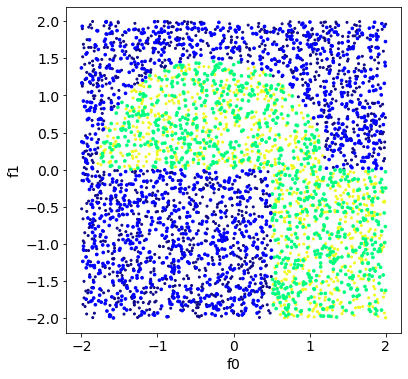

In [5]:
def scat(x,y,s=4,cmap="plasma"):
    plt.scatter(x[:,0],x[:,1],s=s,c=y,cmap=cmap)
    plt.xlabel("f0")
    plt.ylabel("f1")

for n in range(5):
    print(x[n],y[n])

plt.figure(figsize=(6,6))
scat(x_train,y_train)
scat(x_test,y_test,cmap="winter",s=7)
plt.show()

In [6]:
clf=GradientBoostingClassifier()
clf.fit(x_train,y_train)
clf.score(x_test, y_test)

0.9825

In [8]:
"""#warnings.filterwarnings("ignore", category=UserWarning)

n_estimators = range(1,10,1)
learning_rate = [0.2, 0.3, 0.4]
gamma = [0, 0.1 , 1]
max_depth = [1,2,4,6,8]
reg_lambda = [0.1,1,10]
min_child_weight = [0, 1, 10]
max_delta_step = [0, 1, 10]
subsamples = [0,0.5]

param_grid = dict(n_estimators=n_estimators, learning_rate=learning_rate, min_split_loss=gamma, max_depth=max_depth,
                  reg_lambda=reg_lambda,min_child_weight=min_child_weight,max_delta_step=max_delta_step, subsample=subsamples)

model_gridsearch = XGBClassifier(seed=1,
                       #objective='binary:logistic',
                       objective="reg:squarederror",eval_metric="rmse", use_label_encoder=False)

grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=1, cv=4)
grid_result = grid.fit(x_train,y_train)
"""

'#warnings.filterwarnings("ignore", category=UserWarning)\n\nn_estimators = range(1,10,1)\nlearning_rate = [0.2, 0.3, 0.4]\ngamma = [0, 0.1 , 1]\nmax_depth = [1,2,4,6,8]\nreg_lambda = [0.1,1,10]\nmin_child_weight = [0, 1, 10]\nmax_delta_step = [0, 1, 10]\nsubsamples = [0,0.5]\n\nparam_grid = dict(n_estimators=n_estimators, learning_rate=learning_rate, min_split_loss=gamma, max_depth=max_depth,\n                  reg_lambda=reg_lambda,min_child_weight=min_child_weight,max_delta_step=max_delta_step, subsample=subsamples)\n\nmodel_gridsearch = XGBClassifier(seed=1,\n                       #objective=\'binary:logistic\',\n                       objective="reg:squarederror",eval_metric="rmse", use_label_encoder=False)\n\ngrid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=1, cv=4)\ngrid_result = grid.fit(x_train,y_train)\n'

In [9]:
#results = pd.DataFrame.from_dict(grid_result.cv_results_)
#results.to_csv('GridSearchResults_4.csv')
results = pd.read_csv("results_DATA/GridSearchResults_4.csv")

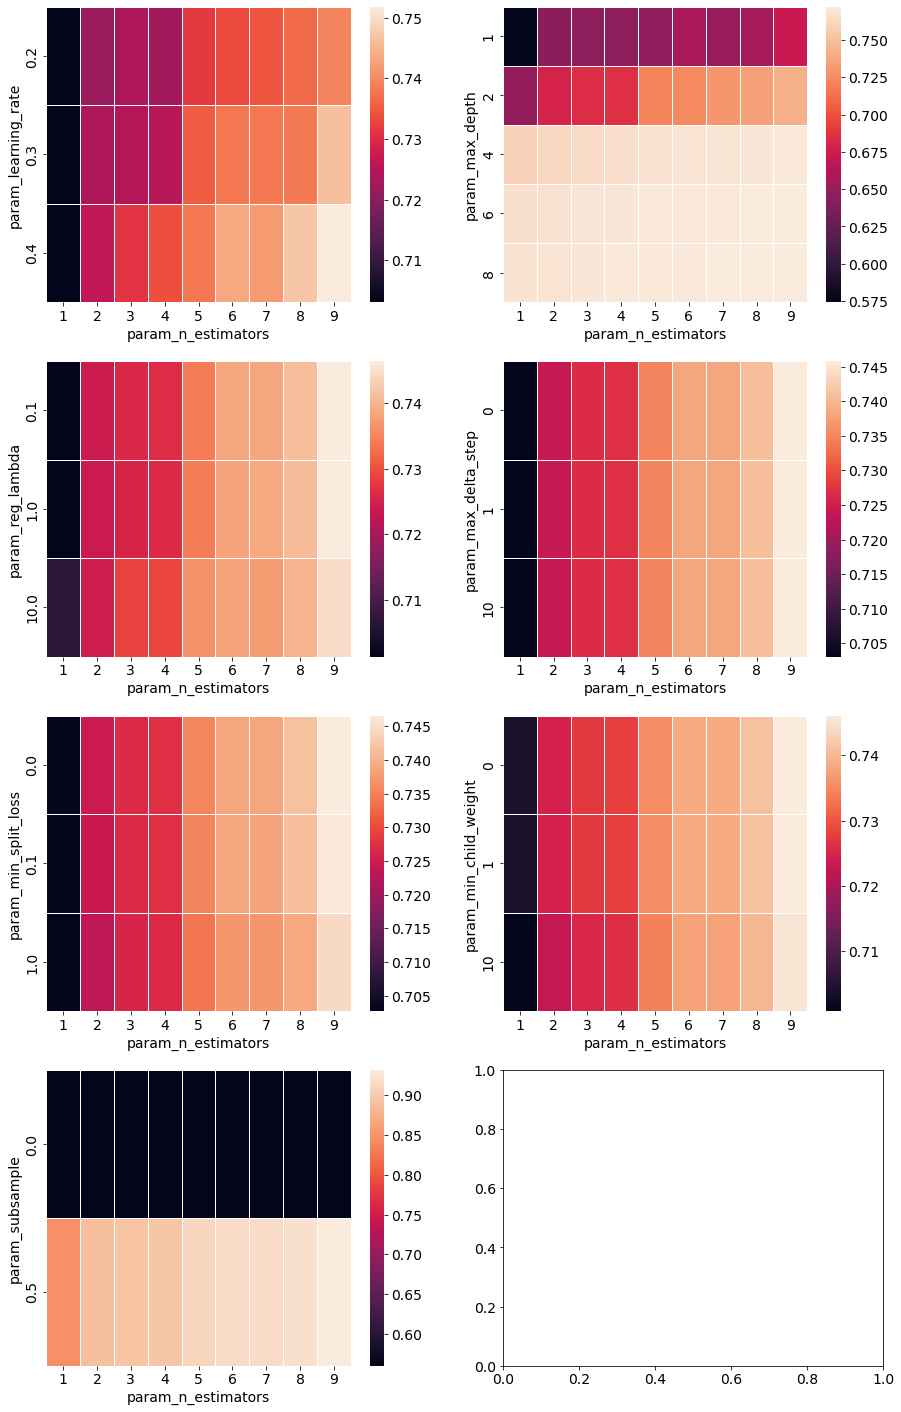

In [10]:
import seaborn as sns
fig, ax = plt.subplots(4,2, figsize = (15,25))
# takes the mean in this way
sns.heatmap(results.pivot_table('mean_test_score','param_learning_rate','param_n_estimators'), linewidth=0.5, ax=ax[0,0])
sns.heatmap(results.pivot_table('mean_test_score','param_max_depth','param_n_estimators'), linewidth=0.5, ax=ax[0,1])
sns.heatmap(results.pivot_table('mean_test_score','param_reg_lambda','param_n_estimators'), linewidth=0.5, ax=ax[1,0])
sns.heatmap(results.pivot_table('mean_test_score','param_max_delta_step','param_n_estimators'), linewidth=0.5, ax=ax[1,1])
sns.heatmap(results.pivot_table('mean_test_score','param_min_split_loss','param_n_estimators'), linewidth=0.5, ax=ax[2,0])
sns.heatmap(results.pivot_table('mean_test_score','param_min_child_weight','param_n_estimators'), linewidth=0.5, ax=ax[2,1])
sns.heatmap(results.pivot_table('mean_test_score','param_subsample','param_n_estimators'), linewidth=0.5, ax=ax[3,0])
plt.show()


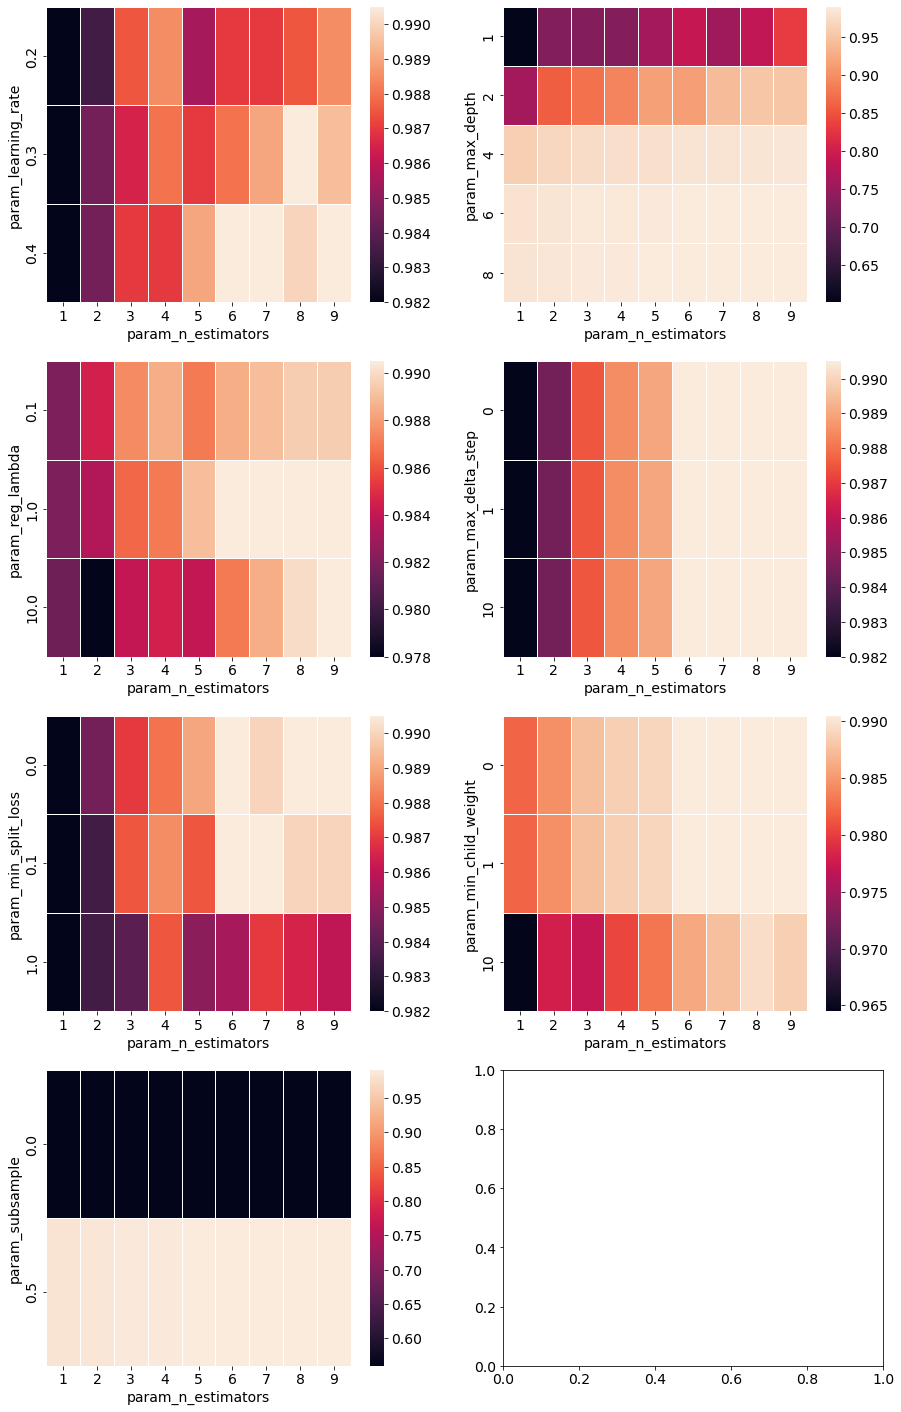

In [11]:


fig, ax = plt.subplots(4,2, figsize = (15,25))
# takes the max in this way
sns.heatmap(results.groupby(['param_learning_rate','param_n_estimators']).max('mean_test_score')['mean_test_score'].unstack(), linewidth=0.5, ax=ax[0,0])
sns.heatmap(results.groupby(['param_max_depth','param_n_estimators']).max('mean_test_score')['mean_test_score'].unstack(), linewidth=0.5, ax=ax[0,1])
sns.heatmap(results.groupby(['param_reg_lambda','param_n_estimators']).max('mean_test_score')['mean_test_score'].unstack(), linewidth=0.5, ax=ax[1,0])
sns.heatmap(results.groupby(['param_max_delta_step','param_n_estimators']).max('mean_test_score')['mean_test_score'].unstack(), linewidth=0.5, ax=ax[1,1])
sns.heatmap(results.groupby(['param_min_split_loss','param_n_estimators']).max('mean_test_score')['mean_test_score'].unstack(), linewidth=0.5, ax=ax[2,0])
sns.heatmap(results.groupby(['param_min_child_weight','param_n_estimators']).max('mean_test_score')['mean_test_score'].unstack(), linewidth=0.5, ax=ax[2,1])
sns.heatmap(results.groupby(['param_subsample','param_n_estimators']).max('mean_test_score')['mean_test_score'].unstack(), linewidth=0.5, ax=ax[3,0])
plt.show()


In [13]:
best_simple = results[(results["param_n_estimators"]==6)&
                      (results["param_reg_lambda"]==1)&
                      (results["param_min_split_loss"]<1)&
                      (results["param_learning_rate"]==.4)&
                      (results["param_max_depth"]==6)&
                      (results["param_subsample"]==.5)&
                      (results["param_min_child_weight"]<10) ]

print("Parameters of the best simple XGBoost model")
id = best_simple['mean_test_score'].idxmax()
print(results.iloc[id]["params"])


Parameters of the best simple XGBoost model
{'learning_rate': 0.4, 'max_delta_step': 0, 'max_depth': 6, 'min_child_weight': 0, 'min_split_loss': 0.1, 'n_estimators': 6, 'reg_lambda': 1, 'subsample': 0.5}


In [14]:
def classify(clf=GradientBoostingClassifier(),show=False):
    clf.fit(x_train,y_train)
    y_hat = clf.predict(x_test)
    
    if CASE<10: print("errors: {:.2f}%".format(100*(1-clf.score(x_test, y_test))))

    dx = 0.02
    x_seq=np.arange(-S,S+dx,dx)
    nx = len(x_seq)
    x_plot=np.zeros((nx*nx,2))
    q=0
    for i in range(nx):
        for j in range(nx):
            x_plot[q,:] = [x_seq[i],x_seq[j]]
            q+=1
    y_plot= clf.predict(x_plot)

    plt.figure(figsize=(6,6))
    plt.title(str(clf))

    scat(x_plot,y_plot,cmap="winter",s=1)
    scat(x_train,y_train,s=7)
    plt.show()
    
    if show:      
        dump_list = clf.get_booster().get_dump()
        num_trees = len(dump_list)
        print("num_trees=",num_trees)
        
        fig, AX = plt.subplots(3,1,figsize=(30, 30))
        for i in range(min(3,num_trees)):
            ax=AX[i]
            plot_tree(clf, num_trees=i, ax=ax)
        fig.savefig("DATA/tree-classif.png", dpi=300, pad_inches=0.02)   
        plt.show()

/root/venv/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[11:02:28] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
errors: 2.10%


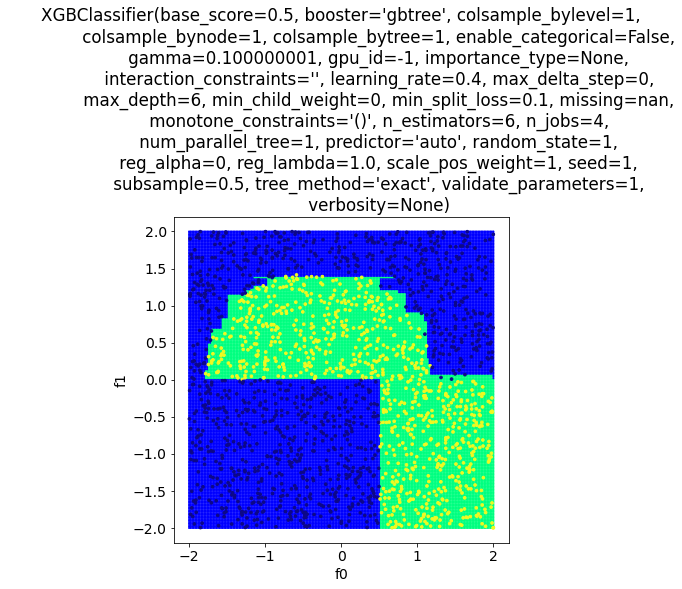

num_trees= 6


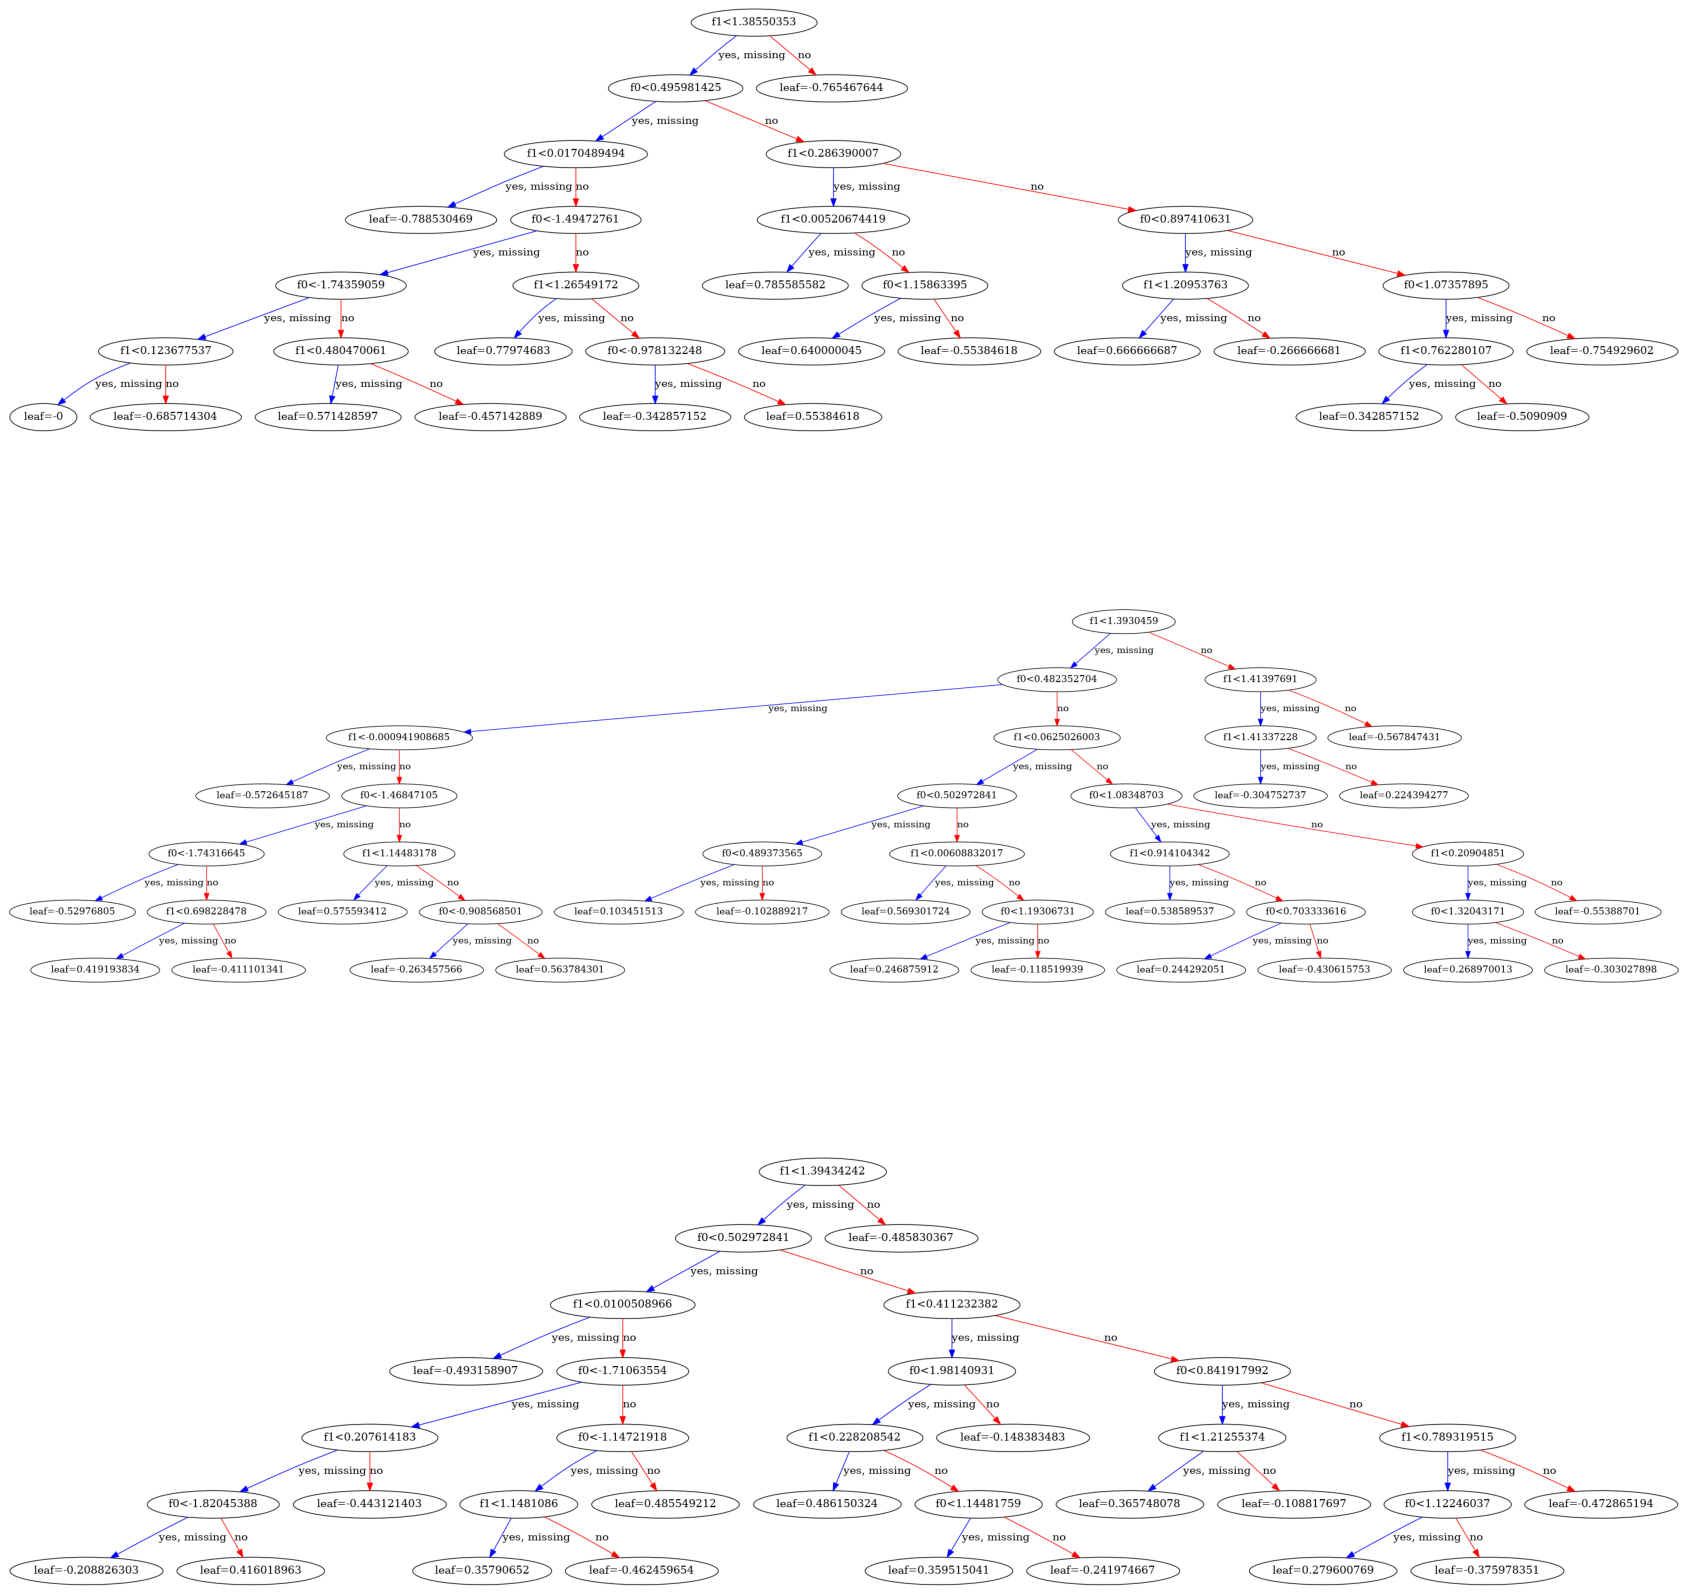

In [18]:
classify(XGBClassifier(seed=1,
                       objective='binary:logistic',
                       #objective="reg:squarederror",eval_metric="rmse",
                       reg_lambda=results.iloc[id]["param_reg_lambda"],
                       n_estimators=results.iloc[id]["param_n_estimators"],
                       min_split_loss=results.iloc[id]["param_min_split_loss"],
                       learning_rate=results.iloc[id]["param_learning_rate"],
                       max_depth=results.iloc[id]["param_max_depth"],
                       subsample=results.iloc[id]["param_subsample"],
                       min_child_weight=results.iloc[id]["param_min_child_weight"]),
                       show=True)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1cb9264e-65a5-431d-a980-16667908489e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>